In [1]:
turki<-read.csv("P:/CODING/GITHUB/econometrics_ugm/Microeconometrics/Regression Discontinuity Design/CIT_2020_CUP_polecon.csv",sep=",", header=1)
head(turki)

,X,Y,T,ageshr19,ageshr60,buyuk,hischshr1520m,i89,lpop1994,merkezi,merkezp,partycount,prov,prov_num,sexr,shhs,subbuyuk,vshr_islam1994
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>
1,-35.60663,22.96296,0,42.20857,7.506742,0,37.93103,0,7.996990,1,0,6,Adana,Adana,97.74815,4.670399,0,1.5448381
2,-54.34782,25.43860,0,44.09879,6.340537,0,30.89005,0,7.362645,0,0,4,Adana,Adana,112.03424,6.813916,0,2.5135870
3,-20.40923,22.68273,0,43.54768,5.539970,1,22.62840,0,13.175261,1,0,14,Adana,Adana,97.46254,4.389300,0,11.1114980
4,-44.97207,15.85366,0,43.86755,6.649007,0,17.11712,0,7.623153,0,0,6,Adana,Adana,102.52145,5.510949,0,5.5865922
5,-20.11494,18.23899,0,41.81067,5.447032,0,17.31343,0,7.647786,0,0,7,Adana,Adana,118.10733,6.234192,0,10.1880870
6,-50.58997,25.00000,0,40.53058,6.963891,0,26.56250,NA,7.312553,0,0,5,Adana,Adana,101.78439,6.004425,0,0.5899705


In [4]:
model=lm(turki$Y[turki$X<0 & turki$X>=-20] ~turki$X[turki$X<0 & turki$X>=-20])
print(model)


Call:
lm(formula = turki$Y[turki$X < 0 & turki$X >= -20] ~ turki$X[turki$X < 
    0 & turki$X >= -20])

Coefficients:
                          (Intercept)  turki$X[turki$X < 0 & turki$X >= -20]  
                              12.6225                                -0.2481  



## R Snippet 8

In [10]:
model_left=lm(turki$Y[turki$X<0 & turki$X>=-20] ~turki$X[turki$X<0 & turki$X>=-20])
left_intercept=model_left$coefficients[1]
print(left_intercept)
model_right=lm(turki$Y[turki$X>0 & turki$X<=20] ~turki$X[turki$X>0 & turki$X<=20])
right_intercept=model_right$coefficients[1]
print(right_intercept)
difference=right_intercept-left_intercept
print(paste("The RD Estimator is", difference, sep=" "))

(Intercept) 
   12.62254 
(Intercept) 
   15.54961 
[1] "The RD Estimator is 2.92707501347344"


## R Snippet 9

In [13]:
turki$T_X=turki$X*turki$T
model3=lm(turki$Y[turki$X>=-20 & turki$X<=20] ~turki$X[turki$X>=-20 & turki$X<=20]
          + turki$T[turki$X>=-20 & turki$X<=20] 
          + turki$T_X[turki$X>=-20 & turki$X<=20])
summary(model3)


Call:
lm(formula = turki$Y[turki$X >= -20 & turki$X <= 20] ~ turki$X[turki$X >= 
    -20 & turki$X <= 20] + turki$T[turki$X >= -20 & turki$X <= 
    20] + turki$T_X[turki$X >= -20 & turki$X <= 20])

Residuals:
    Min      1Q  Median      3Q     Max 
-17.373  -7.718  -0.755   6.384  33.697 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                               12.62254    0.77459  16.296  < 2e-16
turki$X[turki$X >= -20 & turki$X <= 20]   -0.24807    0.06723  -3.690 0.000238
turki$T[turki$X >= -20 & turki$X <= 20]    2.92708    1.23529   2.370 0.018024
turki$T_X[turki$X >= -20 & turki$X <= 20]  0.12612    0.12459   1.012 0.311667
                                             
(Intercept)                               ***
turki$X[turki$X >= -20 & turki$X <= 20]   ***
turki$T[turki$X >= -20 & turki$X <= 20]   *  
turki$T_X[turki$X >= -20 & turki$X <= 20]    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


## R Snippet 10

In [14]:
w=NA
w[turki$X<0 & turki$X>=-20]=1-abs(turki$X[turki$X<0 & turki$X>=-20]/20)
w[turki$X>=0 & turki$X<=20]=1-abs(turki$X[turki$X>=0 & turki$X<20]/20)

## R Snippet 11

In [17]:
model_4_left=lm(turki$Y[turki$X<0] ~turki$X[turki$X<0], weights=w[turki$X<0])
left_intercept_model4=model_4_left$coefficients[1]
print(left_intercept)
model_4_right=lm(turki$Y[turki$X>=0] ~turki$X[turki$X>=0], weights=w[turki$X>=0])
right_intercept_model4=model_4_right$coefficients[1]
print(right_intercept)
difference_model_4=right_intercept_model4-left_intercept_model4
print(paste("The RD Estimator is", difference_model_4, sep=" "))

(Intercept) 
   12.69432 
(Intercept) 
   15.64529 
[1] "The RD Estimator is 2.93731873315284"


## R Snippet 12

In [19]:
library('rdrobust')
model_5=rdrobust(turki$Y, turki$X, kernel="uniform", p=1, h=20)
summary(model_5)

Warning message:
"package 'rdrobust' was built under R version 4.4.3"


Sharp RD estimates using local polynomial regression.

Number of Obs.                 2629
BW type                      Manual
Kernel                      Uniform
VCE method                       NN

Number of Obs.                 2314          315
Eff. Number of Obs.             608          280
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                  20.000       20.000
BW bias (b)                  20.000       20.000
rho (h/b)                     1.000        1.000
Unique Obs.                    2314          315

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     2.927     1.235     2.371     0.018     [0.507 , 5.347]     
        Robust         -         -     1.636     0.102    [-0.582 , 6.471]     


## R Snippet 13

In [21]:
library('rdrobust')
model_6=rdrobust(turki$Y, turki$X, kernel="triangular", p=1, h=20)
summary(model_6)

Sharp RD estimates using local polynomial regression.

Number of Obs.                 2629
BW type                      Manual
Kernel                   Triangular
VCE method                       NN

Number of Obs.                 2314          315
Eff. Number of Obs.             608          280
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                  20.000       20.000
BW bias (b)                  20.000       20.000
rho (h/b)                     1.000        1.000
Unique Obs.                    2314          315

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     2.937     1.343     2.187     0.029     [0.305 , 5.569]     
        Robust         -         -     1.379     0.168    [-1.117 , 6.414]     


## R Snippet 14

In [22]:
library('rdrobust')
model_7=rdrobust(turki$Y, turki$X, kernel="triangular", p=2, h=20)
summary(model_7)

Sharp RD estimates using local polynomial regression.

Number of Obs.                 2629
BW type                      Manual
Kernel                   Triangular
VCE method                       NN

Number of Obs.                 2314          315
Eff. Number of Obs.             608          280
Order est. (p)                    2            2
Order bias  (q)                   3            3
BW est. (h)                  20.000       20.000
BW bias (b)                  20.000       20.000
rho (h/b)                     1.000        1.000
Unique Obs.                    2314          315

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     2.649     1.921     1.379     0.168    [-1.117 , 6.414]     
        Robust         -         -     0.420     0.674    [-3.969 , 6.135]     


## R Snippet 15

In [26]:
library('rdrobust')
model_15=rdbwselect(turki$Y, turki$X, kernel="triangular", p=1, bwselect="mserd")
summary(model_15)

Call: rdbwselect

Number of Obs.                 2629
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                 2314          315
Order est. (p)                    1            1
Order bias  (q)                   2            2
Unique Obs.                    2311          315

                  BW est. (h)    BW bias (b)
            Left of c Right of c  Left of c Right of c
     mserd    17.240     17.240     28.576     28.576


## R Snippet 16

In [27]:
library('rdrobust')
model_16=rdbwselect(turki$Y, turki$X, kernel="triangular", p=1, bwselect="msetwo")
summary(model_16)

Call: rdbwselect

Number of Obs.                 2629
BW type                      msetwo
Kernel                   Triangular
VCE method                       NN

Number of Obs.                 2314          315
Order est. (p)                    1            1
Order bias  (q)                   2            2
Unique Obs.                    2311          315

                  BW est. (h)    BW bias (b)
            Left of c Right of c  Left of c Right of c
    msetwo    19.967     17.360     32.279     29.729


## R Snippet 17

In [29]:
library('rdrobust')
model_17=rdrobust(turki$Y, turki$X, kernel="triangular", p=1, bwselect="mserd")
summary(model_17)

Sharp RD estimates using local polynomial regression.

Number of Obs.                 2629
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                 2314          315
Eff. Number of Obs.             529          266
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                  17.240       17.240
BW bias (b)                  28.576       28.576
rho (h/b)                     0.603        0.603
Unique Obs.                    2311          315

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     3.020     1.427     2.116     0.034     [0.223 , 5.816]     
        Robust         -         -     1.776     0.076    [-0.309 , 6.276]     


## R Snippet 18

In [36]:
rdout=rdrobust(turki$Y, turki$X, kernel="triangular", p=1, bwselect="mserd")
print(names(rdout)[1:27])
print(rdout$beta_Y_p_r)
print(rdout$beta_Y_p_l)


 [1] "Estimate"   "bws"        "coef"       "se"         "z"         
 [6] "pv"         "ci"         "beta_Y_p_l" "beta_Y_p_r" "V_cl_l"    
[11] "V_cl_r"     "V_rb_l"     "V_rb_r"     "N"          "N_h"       
[16] "N_b"        "M"          "tau_cl"     "tau_bc"     "c"         
[21] "p"          "q"          "bias"       "kernel"     "all"       
[26] "vce"        "bwselect"  
[1] 15.664938 -0.146083
[1] 12.6454115 -0.2477253


## R Snippet 19

Call: rdplot

Number of Obs.                  795
Kernel                   Triangular

Number of Obs.                  529             266
Eff. Number of Obs.             528             265
Order poly. fit (p)               1               1
BW poly. fit (h)             17.225          17.048
Number of bins scale              1               1

Bins Selected                    19              17
Average Bin Length            0.907           1.003
Median Bin Length             0.907           1.003

IMSE-optimal bins                 5               3
Mimicking Variance bins          19              17

Relative to IMSE-optimal:
Implied scale                 3.800           5.667
WIMSE variance weight         0.018           0.005
WIMSE bias weight             0.982           0.995



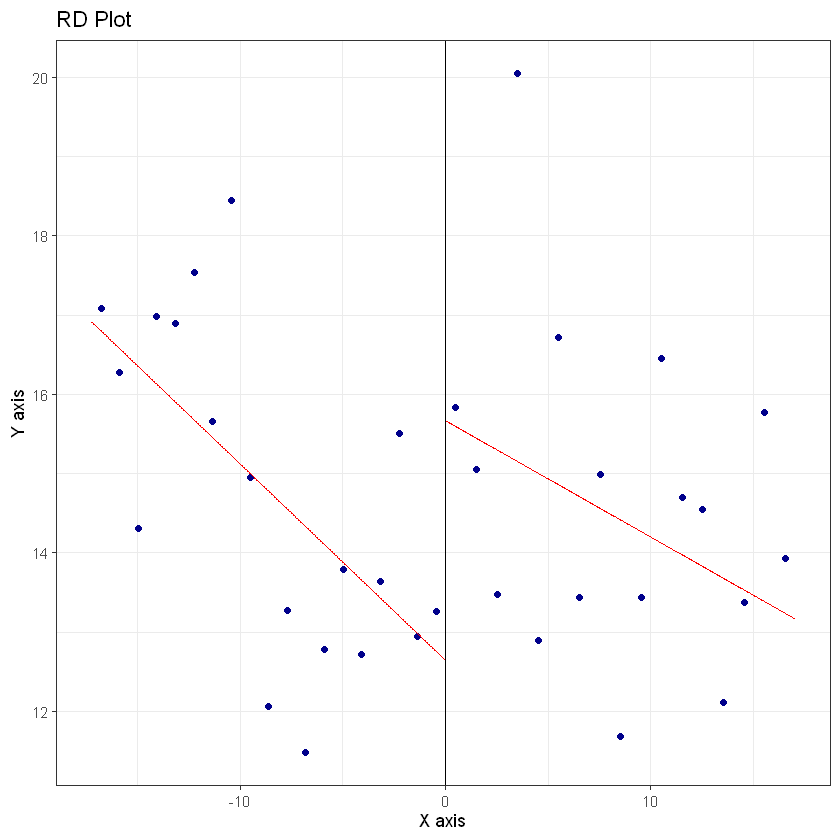

In [42]:
bandwith=rdrobust(turki$Y,turki$X,kernel="triangular", p=1, bwselect="mserd")$bws[1,1]
model_19=rdplot(y=turki$Y[abs(x=turki$X)<=bandwith], 
                x=turki$X[abs(x=turki$X)<=bandwith], 
                p=1, 
                kernel="triangular")
summary(model_19)

## R Snippet 20

In [43]:
model_20=rdrobust(turki$Y,turki$X,kernel="triangular", scaleregul=0, p=1, bwselect="mserd")
summary(model_20)

Sharp RD estimates using local polynomial regression.

Number of Obs.                 2629
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                 2314          315
Eff. Number of Obs.            1152          305
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                  34.983       34.983
BW bias (b)                  46.234       46.234
rho (h/b)                     0.757        0.757
Unique Obs.                    2311          315

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     2.843     1.110     2.562     0.010     [0.668 , 5.018]     
        Robust         -         -     2.384     0.017     [0.596 , 6.104]     


## R Snippet 21

In [44]:
model_21=rdrobust(turki$Y,turki$X,kernel="triangular", p=1, bwselect="mserd")
summary(model_21)

Sharp RD estimates using local polynomial regression.

Number of Obs.                 2629
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                 2314          315
Eff. Number of Obs.             529          266
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                  17.240       17.240
BW bias (b)                  28.576       28.576
rho (h/b)                     0.603        0.603
Unique Obs.                    2311          315

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     3.020     1.427     2.116     0.034     [0.223 , 5.816]     
        Robust         -         -     1.776     0.076    [-0.309 , 6.276]     


## R Snippet 22

In [45]:
model_22=rdrobust(turki$Y,turki$X,kernel="triangular", p=1, bwselect="mserd", all=TRUE)
summary(model_22)

Sharp RD estimates using local polynomial regression.

Number of Obs.                 2629
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                 2314          315
Eff. Number of Obs.             529          266
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                  17.240       17.240
BW bias (b)                  28.576       28.576
rho (h/b)                     0.603        0.603
Unique Obs.                    2311          315

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     3.020     1.427     2.116     0.034     [0.223 , 5.816]     
Bias-Corrected     2.983     1.427     2.090     0.037     [0.186 , 5.780]     
        Robust     2.983     1.680     1.776     0.076    [-0.309 , 6.276]     


## R Snippet 23

In [46]:
model_23=rdrobust(turki$Y,turki$X,kernel="triangular", p=1, bwselect="cerrd")
summary(model_23)

Sharp RD estimates using local polynomial regression.

Number of Obs.                 2629
BW type                       cerrd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                 2314          315
Eff. Number of Obs.             360          216
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                  11.629       11.629
BW bias (b)                  28.576       28.576
rho (h/b)                     0.407        0.407
Unique Obs.                    2311          315

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     2.430     1.682     1.444     0.149    [-0.868 , 5.727]     
        Robust         -         -     1.324     0.186    [-1.158 , 5.979]     


## R Snippet 24

In [47]:
model_24=rdbwselect(turki$Y,turki$X,kernel="triangular", all=TRUE)
summary(model_24)

Call: rdbwselect

Number of Obs.                 2629
BW type                         All
Kernel                   Triangular
VCE method                       NN

Number of Obs.                 2314          315
Order est. (p)                    1            1
Order bias  (q)                   2            2
Unique Obs.                    2311          315

                  BW est. (h)    BW bias (b)
            Left of c Right of c  Left of c Right of c
     mserd    17.240     17.240     28.576     28.576
    msetwo    19.967     17.360     32.279     29.729
    msesum    17.772     17.772     30.154     30.154
  msecomb1    17.240     17.240     28.576     28.576
  msecomb2    17.772     17.360     30.154     29.729
     cerrd    11.629     11.629     28.576     28.576
    certwo    13.469     11.710     32.279     29.729
    cersum    11.988     11.988     30.154     30.154
  cercomb1    11.629     11.629     28.576     28.576
  cercomb2    11.988     11.710     30.154     29.729


## R Snippet 25

In [52]:
Z=cbind(turki$vshr_islam1994, turki$partycount, turki$lpop1994, 
        turki$merkezi, turki$merkezp, turki$subbuyuk, turki$buyuk)
colnames(Z)=c("vshr_islam1994", "partycount", "lpop1994", 
        "merkezi", "merkezp", "subbuyuk", "buyuk")
model25=rdbwselect(turki$Y,turki$X, covs=Z, kernel="triangular", scaleregul=1, p=1, bwselect="mserd")
summary(model25)

Call: rdbwselect

Number of Obs.                 2629
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                 2314          315
Order est. (p)                    1            1
Order bias  (q)                   2            2
Unique Obs.                    2311          315

                  BW est. (h)    BW bias (b)
            Left of c Right of c  Left of c Right of c
     mserd    14.410     14.410     23.733     23.733


In [51]:
ncol(Z)

[1] 6

## R Snippet 26

In [53]:
Z=cbind(turki$vshr_islam1994, turki$partycount, turki$lpop1994, 
        turki$merkezi, turki$merkezp, turki$subbuyuk, turki$buyuk)
colnames(Z)=c("vshr_islam1994", "partycount", "lpop1994", 
        "merkezi", "merkezp", "subbuyuk", "buyuk")
model26=rdrobust(turki$Y,turki$X, covs=Z, kernel="triangular", scaleregul=1, p=1, bwselect="mserd")
summary(model26)

Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                 2629
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                 2314          315
Eff. Number of Obs.             448          241
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                  14.410       14.410
BW bias (b)                  23.733       23.733
rho (h/b)                     0.607        0.607
Unique Obs.                    2311          315

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     3.108     1.284     2.421     0.015     [0.592 , 5.624]     
        Robust         -         -     2.088     0.037     [0.194 , 6.132]     


## R Snippet 27

In [55]:
model27=rdrobust(turki$Y,turki$X, kernel="triangular", scaleregul=1, p=1, 
                 bwselect="mserd", cluster=turki$prov_num)
summary(model27)

Sharp RD estimates using local polynomial regression.

Number of Obs.                 2629
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                 2314          315
Eff. Number of Obs.             584          277
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                  19.036       19.036
BW bias (b)                  29.875       29.875
rho (h/b)                     0.637        0.637
Unique Obs.                    2311          315

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     2.969     1.604     1.851     0.064    [-0.175 , 6.113]     
        Robust         -         -     1.635     0.102    [-0.583 , 6.460]     


## R Snippet 28

In [56]:
model28=rdrobust(turki$Y,turki$X, kernel="triangular", scaleregul=1, p=1, 
                 bwselect="mserd", covs=Z, cluster=turki$prov_num)
summary(model28)

Covariate-adjusted Sharp RD estimates using local polynomial regression.

Number of Obs.                 2629
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                 2314          315
Eff. Number of Obs.             481          254
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                  15.677       15.677
BW bias (b)                  24.667       24.667
rho (h/b)                     0.636        0.636
Unique Obs.                    2311          315

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     3.146     1.301     2.419     0.016     [0.597 , 5.696]     
        Robust         -         -     2.121     0.034     [0.243 , 6.154]     
